In [57]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 평가를 위한 라이브러리
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import seaborn as sns  # 시각화 라이브러리

In [93]:
train = pd.read_csv('data/KTtrain.csv', index_col = 'day_text')
test = pd.read_csv('data/KTtest.csv', index_col = 'day_text')

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 4.1수 to 5.1화
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team_text    450 non-null    object 
 1   H_text       450 non-null    int64  
 2   HR_text      450 non-null    int64  
 3   S_text       450 non-null    int64  
 4   ST_text      450 non-null    int64  
 5   DU_text      450 non-null    int64  
 6   ER_text      450 non-null    int64  
 7   result_text  450 non-null    int64  
 8   location     450 non-null    object 
 9   temp         450 non-null    float64
 10  rain         450 non-null    float64
 11  humidity     450 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 45.7+ KB


In [95]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 5.3목 to 9.29일
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team_text    243 non-null    object 
 1   H_text       243 non-null    int64  
 2   HR_text      243 non-null    int64  
 3   S_text       243 non-null    int64  
 4   ST_text      243 non-null    int64  
 5   DU_text      243 non-null    int64  
 6   ER_text      243 non-null    int64  
 7   result_text  243 non-null    int64  
 8   location     243 non-null    object 
 9   temp         243 non-null    float64
 10  rain         243 non-null    float64
 11  humidity     243 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 24.7+ KB


In [96]:
train.corr()

,H_text,HR_text,S_text,ST_text,DU_text,ER_text,result_text,temp,rain,humidity
H_text,1.000000,0.413537,0.205983,-0.058204,0.077458,0.016948,0.441667,0.098507,0.012369,0.040848
HR_text,0.413537,1.000000,0.004144,0.014554,-0.089664,-0.029668,0.323892,0.045048,0.044061,0.105578
S_text,0.205983,0.004144,1.000000,0.108077,-0.105318,0.015976,0.157284,-0.053813,-0.038473,-0.011773
ST_text,-0.058204,0.014554,0.108077,1.000000,-0.232241,-0.033553,-0.108047,-0.106493,-0.096977,-0.036809
DU_text,0.077458,-0.089664,-0.105318,-0.232241,1.000000,0.073109,-0.032726,0.061716,0.006549,0.043887
ER_text,0.016948,-0.029668,0.015976,-0.033553,0.073109,1.000000,-0.153878,0.041266,-0.069616,-0.026483
result_text,0.441667,0.323892,0.157284,-0.108047,-0.032726,-0.153878,1.000000,-0.058038,0.006374,0.054498
temp,0.098507,0.045048,-0.053813,-0.106493,0.061716,0.041266,-0.058038,1.000000,-0.038184,-0.087789
rain,0.012369,0.044061,-0.038473,-0.096977,0.006549,-0.069616,0.006374,-0.038184,1.000000,0.148884
humidity,0.040848,0.105578,-0.011773,-0.036809,0.043887,-0.026483,0.054498,-0.087789,0.148884,1.000000


### 데이터 탐색(result_text 의 빈도가 높은 경우를 찾기)

In [97]:
test_result = test[['team_text', 'result_text', 'location']].groupby(['team_text','result_text']).count()
test_result

location
team_text result_text          
kt wiz    0                 130
          1                 113

### 온도 5도 기준으로 나눠서 시각화
- 어느 온도에서 야구 경기가 많이 이루어졌는지 볼 수 있음

In [98]:
bins = [1,3,9,12,15,18,21,24]  # 구간 만들기
labels = ['5~10', '10~15', '15~20', '20~25', '25~30', '30~35', '35~40']
train['temp'] = pd.cut(train['temp'], bins = bins, labels = labels)
test['temp'] = pd.cut(test['temp'], bins = bins, labels = labels)

#1bins = [1,3,5,9,12,15,18,21,24]  # 구간 만들기 # 1,3,5,9,12,15,18,21,24  # 5,11,16,21,26,31,36,41
#1labels = ['5~10', '10~15', '15~20', '20~25', '25~30', '30~35', '35~40'] # 5 로 나눈것.


# 1labels = ['5~10', '10~15', '15~20', '20~25', '25~30', '30~35', '35~40']



#1train['temp'] = pd.cut(train['temp'], bins = bins, labels = labels)
#1test['temp'] = pd.cut(test['temp'], bins = bins, labels = labels)

<AxesSubplot:xlabel='temp', ylabel='count'>

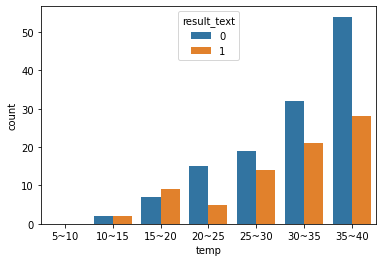

In [99]:
sns.countplot(data = train, x = 'temp', hue='result_text')

### 강수량 3mm 를 기준으로 나눠서 시각화

In [30]:
bins = [0,4,7,10,13,16,19]  # 구간 만들기
labels = ['0~3', '3~6', '6~9', '9~12', '12~15', '15~18']
train['rain'] = pd.cut(train['rain'], bins = bins, labels = labels)
test['rain'] = pd.cut(test['rain'], bins = bins, labels = labels)

<AxesSubplot:xlabel='rain', ylabel='count'>

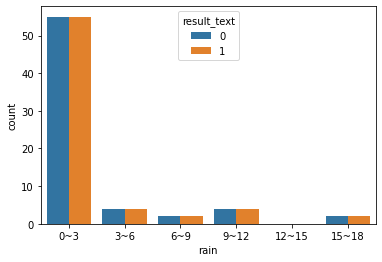

In [37]:
sns.countplot(data = train, x = 'rain', hue='result_text')

### 습도 10% 를 기준으로 나눠서 시각화

In [61]:
bins = [0,11,21,31,41,51,61,71,81,91,101]  # 구간 만들기
labels = ['0~10', '10~20', '20~30', '30~40', '40~50', '50~60', '60~70', '70~80', '80~90', '90~100']
train['humidity'] = pd.cut(train['humidity'], bins = bins, labels = labels)
test['humidity'] = pd.cut(test['humidity'], bins = bins, labels = labels)

<AxesSubplot:xlabel='humidity', ylabel='count'>

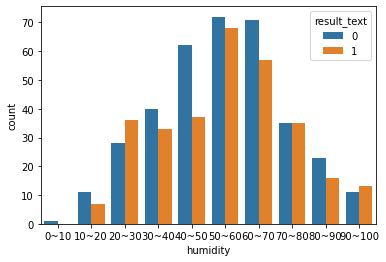

In [62]:
sns.countplot(data = train, x = 'humidity', hue='result_text')

In [63]:
test_result = test[['humidity', 'team_text', 'HR_text', 'location']].groupby(['humidity', 'team_text','HR_text']).count()
test_result

location
humidity team_text HR_text          
0~10     KIA 타이거즈  0             NaN
                   1             NaN
                   2             NaN
                   3             NaN
                   4             NaN
                   5             NaN
                   6             NaN
                   8             NaN
10~20    KIA 타이거즈  0             3.0
                   1             2.0
                   2             NaN
                   3             NaN
                   4             NaN
                   5             NaN
                   6             NaN
                   8             NaN
20~30    KIA 타이거즈  0            11.0
                   1            12.0
                   2             4.0
                   3             NaN
                   4             NaN
                   5             NaN
                   6             NaN
                   8             NaN
30~40    KIA 타이거즈  0            16.0
                   1            17.0
                   2            11.0
                   3             2.0
                   4             NaN
                   5             1.0
                   6             NaN
                   8             NaN
40~50    KIA 타이거즈  0            22.0
                   1            14.0
                   2             6.0
                   3             7.0
                   4             1.0
                   5             NaN
                   6             NaN
                   8             NaN
50~60    KIA 타이거즈  0            25.0
                   1            29.0
                   2            19.0
                   3             4.0
                   4             NaN
                   5             NaN
                   6             NaN
                   8             NaN
60~70    KIA 타이거즈  0            30.0
                   1            26.0
                   2             7.0
                   3             6.0
                   4             1.0
                   5             1.0
                   6             1.0
                   8             1.0
70~80    KIA 타이거즈  0            18.0
                   1            18.0
                   2             7.0
                   3             5.0
                   4             NaN
                   5             NaN
                   6             NaN
                   8             NaN
80~90    KIA 타이거즈  0            12.0
                   1            12.0
                   2             6.0
                   3             NaN
                   4             1.0
                   5             NaN
                   6             NaN
                   8             NaN
90~100   KIA 타이거즈  0             9.0
                   1            11.0
                   2             3.0
                   3             1.0
                   4             NaN
                   5             NaN
                   6             NaN
                   8             NaN

### 일단 팀 구별 없이 데이터 넣고 모델 돌려보기
- 팀 이름 데이터와 location 데이터 drop

* 위에서 부터 실행 시킬때 카테고리화 되기 때문에 데이터 다시 불러와야함

In [18]:
train.drop('team_text', axis = 1 , inplace = True)
test.drop('team_text', axis = 1 , inplace = True)

In [19]:
train.drop('location', axis = 1 , inplace = True)
test.drop('location', axis = 1 , inplace = True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 4.7 to 7.7
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   H_text       7000 non-null   int64  
 1   HR_text      7000 non-null   int64  
 2   S_text       7000 non-null   int64  
 3   ST_text      7000 non-null   int64  
 4   DU_text      7000 non-null   int64  
 5   ER_text      7000 non-null   int64  
 6   result_text  7000 non-null   int64  
 7   temp         7000 non-null   float64
 8   rain         7000 non-null   float64
 9   humidity     7000 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 601.6+ KB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3398 entries, 7.7 to 10.26토
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   H_text       3398 non-null   int64  
 1   HR_text      3398 non-null   int64  
 2   S_text       3398 non-null   int64  
 3   ST_text      3398 non-null   int64  
 4   DU_text      3398 non-null   int64  
 5   ER_text      3398 non-null   int64  
 6   result_text  3398 non-null   int64  
 7   temp         3398 non-null   float64
 8   rain         3398 non-null   float64
 9   humidity     3398 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 292.0+ KB


#### train 과 test 데이터 설정

In [22]:
y_train = train['result_text']
X_train = train.drop('result_text', axis = 1)
y_test = test['result_text']
X_test = test.drop('result_text', axis = 1)

### KNN 모델

In [23]:
knn_model = KNeighborsClassifier(n_neighbors = 50)
result = cross_val_score(knn_model,
                        X_train,
                        y_train,
                        cv = 5)
result

array([0.67214286, 0.69785714, 0.68928571, 0.69928571, 0.67785714])

In [24]:
result.mean()

0.6872857142857143

#### KNN Scaler 적용

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(X_train)  # 평균과 표준편차로 scaling 한 값을 컴퓨터가 기억

StandardScaler()

In [31]:
transform_X_train = scaler.transform(X_train)
transform_X_train

array([[ 0.39440379, -0.86226809,  1.10850335, ..., -2.42099129,
        -0.06986745, -0.53554598],
       [ 0.12547465,  0.09186985,  1.10850335, ..., -2.42099129,
        -0.06986745, -0.53554598],
       [-0.95024191, -0.86226809,  1.10850335, ..., -2.86576949,
        -0.06986745, -0.88029456],
       ...,
       [-0.41238363, -0.86226809, -0.784987  , ...,  0.63685884,
        -0.06986745,  1.74841335],
       [ 0.39440379,  2.9542837 , -0.784987  , ...,  0.32180762,
        -0.06986745,  1.70531977],
       [-0.14345449,  0.09186985, -0.784987  , ...,  0.32180762,
        -0.06986745,  1.70531977]])

In [32]:
transform_X_test = scaler.transform(X_test)
transform_X_test

array([[ 1.20119121,  2.00014575, -0.784987  , ...,  0.91484522,
        -0.06986745,  0.97272904],
       [ 0.12547465, -0.86226809, -0.784987  , ...,  0.91484522,
        -0.06986745,  0.97272904],
       [ 0.39440379,  0.09186985,  0.16175818, ...,  0.50713187,
        -0.06986745,  1.18819691],
       ...,
       [-1.48810019, -0.86226809, -0.784987  , ..., -1.12372154,
        -0.06986745,  0.54179332],
       [ 1.20119121, -0.86226809,  0.16175818, ..., -2.36539401,
        -0.06986745,  0.1108576 ],
       [ 0.66333293, -0.86226809, -0.784987  , ..., -2.36539401,
        -0.06986745,  0.1108576 ]])

In [33]:
result = cross_val_score(knn_model,
                        transform_X_train,
                        y_train,
                        cv = 5)
result

array([0.72571429, 0.70857143, 0.72357143, 0.72142857, 0.71142857])

In [34]:
result.mean()

0.7181428571428572

#### KNN Scaler 적용

In [35]:
y_pred = knn_model.fit(transform_X_train, y_train).predict(transform_X_test)

In [36]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (transform_X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 969


In [37]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.71


### Decision Tree 모델

In [38]:
tree_model = DecisionTreeClassifier(max_depth = 7)

In [39]:
result = cross_val_score(tree_model,
                        X_train,
                        y_train,
                        cv = 10)
result

array([0.67857143, 0.67714286, 0.68428571, 0.66142857, 0.67571429,
       0.70428571, 0.68428571, 0.68285714, 0.66714286, 0.71285714])

In [40]:
result.mean()

0.6828571428571428

In [41]:
y_pred = tree_model.fit(X_train, y_train).predict(X_test)

In [42]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 1019


In [43]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.70


### Naive Bayes 분류 모델

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
nb = GaussianNB()

In [46]:
y_pred = nb.fit(X_train, y_train).predict(X_test)

In [47]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 1010


In [48]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.70


### SVM 분류 모델

In [49]:
svm_model = SVC(kernel='rbf', C=300, gamma=0.0001)

In [50]:
y_pred = svm_model.fit(X_train, y_train).predict(X_test)

In [51]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 955


In [52]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.72


### XGBOOST 모델

In [53]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [54]:
xgb = XGBClassifier(n_estimators = 5000, learning_rate = 0.001, max_depth = 5)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

C:\Users\smhrd\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:28:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [55]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != xgb_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 958


In [56]:
print("예측 정확도: {:.2f}".format(np.mean(xgb_pred == y_test)))

예측 정확도: 0.72
